# [Tarea 09] Ejercicios Unidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan
### CONJUNTO DE EJERCICIOS

- Mateo Molina Moises Estrella

**Link Repositorio:** https://github.com/R3LM15/MetodosNumericos_MateoMolina




1.  Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos.
Explique los resultados desde un punto de vista geométrico.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_elimination(a, b, tol=1e-10):
    a = a.astype(float)
    b = b.astype(float)
    n = len(b)
    Ab = np.hstack([a, b.reshape(-1, 1)])

    # Eliminación hacia adelante
    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        Ab[[i, max_row]] = Ab[[max_row, i]]

        if abs(Ab[i, i]) < tol:
            continue

        for j in range(i+1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= factor * Ab[i, i:]

    # Verificación del tipo de solución
    rango_a = np.sum([not np.all(np.abs(row[:-1]) < tol) for row in Ab])
    rango_ab = np.sum([not np.all(np.abs(row) < tol) for row in Ab])

    if rango_a < rango_ab:
        print("El sistema no tiene solución.")
        return None
    elif rango_a < n:
        print("El sistema tiene infinitas soluciones.")
        return None
    else:
        # Sustitución regresiva
        x = np.zeros(n)
        for i in range(n-1, -1, -1):
            if abs(Ab[i, i]) < tol:
                x[i] = 0
                continue
            suma = sum(Ab[i, j] * x[j] for j in range(i+1, n))
            x[i] = (Ab[i, -1] - suma) / Ab[i, i]
        return x

def resolver_minimos_cuadrados(a, b):
    x, residuals, rank, s = np.linalg.lstsq(a, b, rcond=None)
    return x

def graficar_sistema(a, b):
    m, n = a.shape
    if n != 2:
        print("Solo se puede graficar sistemas con 2 incógnitas.")
        return

    x_vals = np.linspace(-10, 10, 400)
    plt.figure(figsize=(8,6))

    for i in range(m):
        if abs(a[i, 1]) > 1e-12:  # Evitar división por cero
            y = (b[i] - a[i, 0]*x_vals) / a[i, 1]
            plt.plot(x_vals, y, label=f"Ecuación {i+1}")
        else:
            x_const = b[i] / a[i, 0]
            plt.axvline(x_const, label=f"Ecuación {i+1}")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Gráfica del sistema {m}x2")
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.legend()
    plt.show()






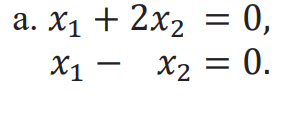

Solución: [ 0. -0.]


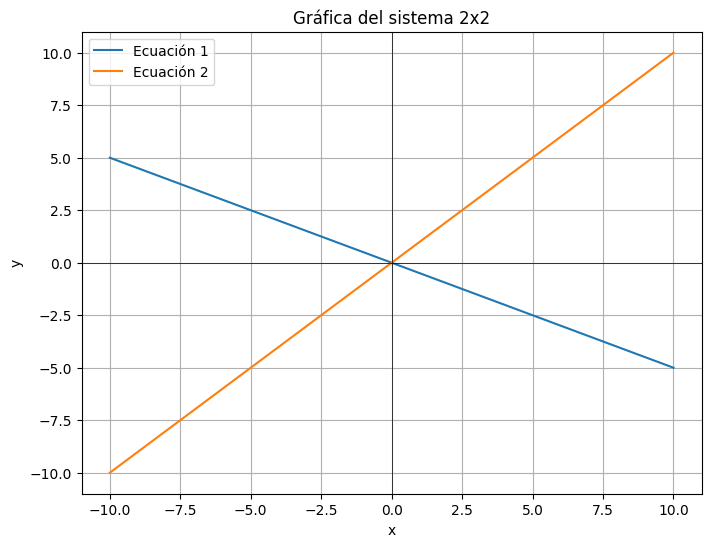

In [20]:
A = np.array([[1, 2],
              [1, -1]])
b = np.array([0, 0])

x = gauss_elimination(A, b)
if x is not None:
    print("Solución:", x)

graficar_sistema(A, b)


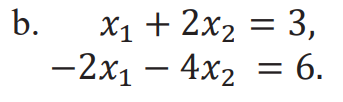

El sistema no tiene solución.


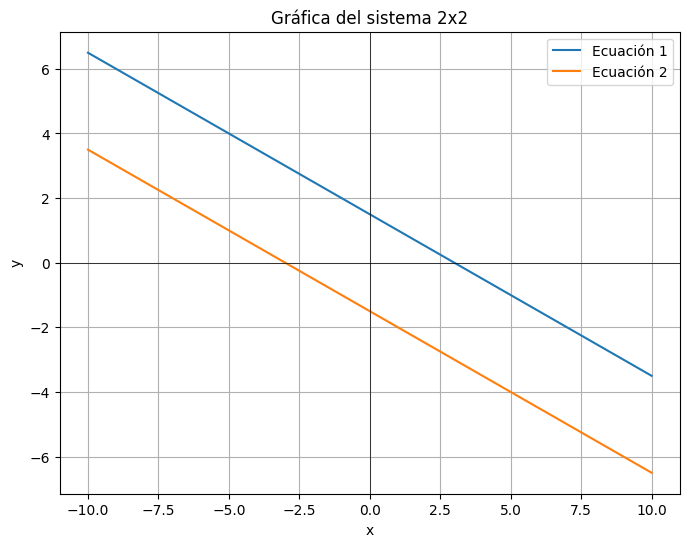

In [21]:
A = np.array([[1, 2],
              [-2, -4]])

b = np.array([3, 6])

x = gauss_elimination(A, b)
if x is not None:
    print("Solución:", x)

graficar_sistema(A, b)


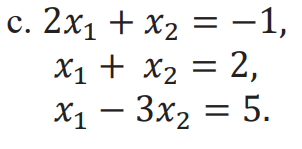

El sistema no tiene solución.


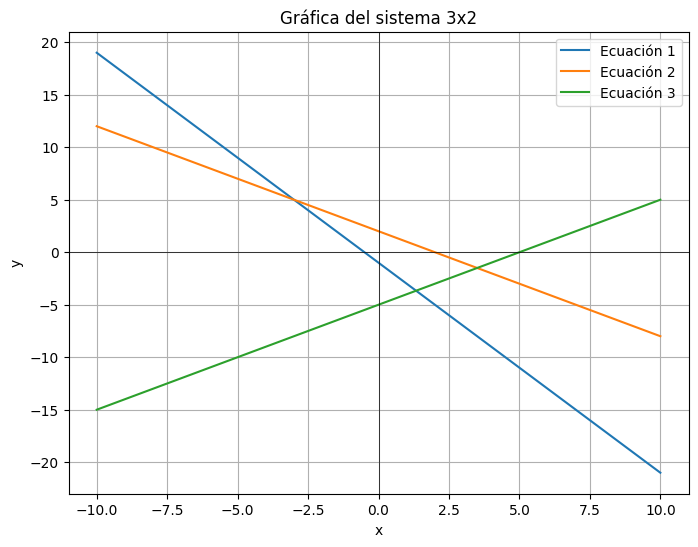

In [22]:
A = np.array([[2, 1],
              [1, 1],
              [1, -1]])

b = np.array([-1, 2, 5])

x = gauss_elimination(A, b)
if x is not None:
    print("Solución:", x)

graficar_sistema(A, b)

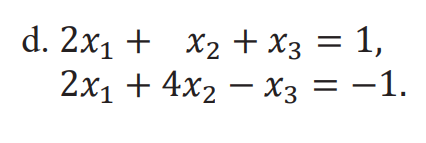

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def graficar_sistema_3d(a, b):
    m, n = a.shape
    if n != 3:
        print("Solo se puede graficar sistemas con 3 incógnitas.")
        return

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    # Definir rango para x,y
    x = np.linspace(-10, 10, 50)
    y = np.linspace(-10, 10, 50)
    X, Y = np.meshgrid(x, y)

    for i in range(m):
        if abs(a[i, 2]) > 1e-12:
            # z = (d - ax - by) / c
            Z = (b[i] - a[i, 0]*X - a[i, 1]*Y) / a[i, 2]
            ax.plot_surface(X, Y, Z, alpha=0.5, label=f'Plano {i+1}')
        else:
            print(f"No se puede graficar el plano {i+1} (coeficiente de z=0).")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Sistema de {m} planos en 3D')
    plt.show()



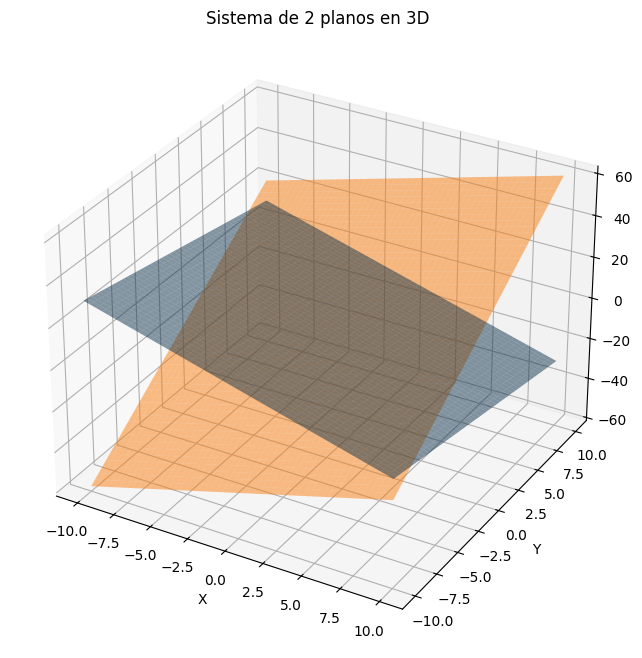

In [26]:
A = np.array([[2, 1,1],
              [2, 4,-1]])

b = np.array([1, -1])

graficar_sistema_3d(A, b)


- Analisis geométrico

Si las rectas se cruzan en un punto, hay una solución única.

Si son paralelas, no hay solución (inconsistente).

Si son la misma recta, hay infinitas soluciones (dependiente).

2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver
los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es 𝑥1 = −1,
𝑥2 = 2, 𝑥3 = 3.)

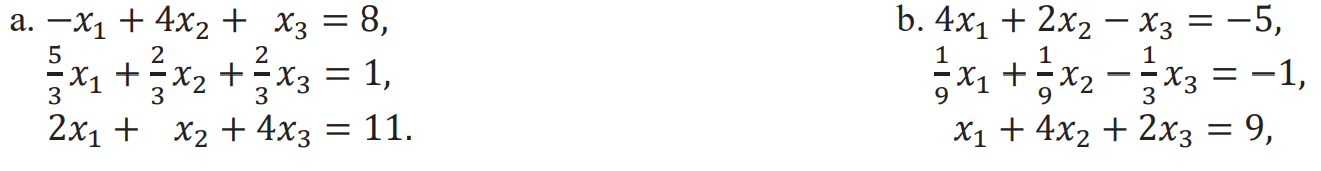

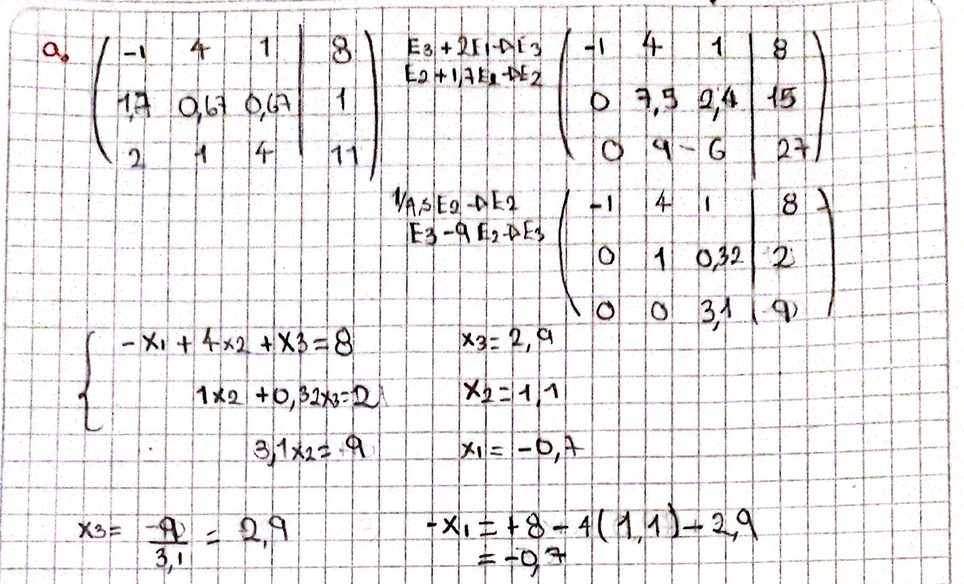

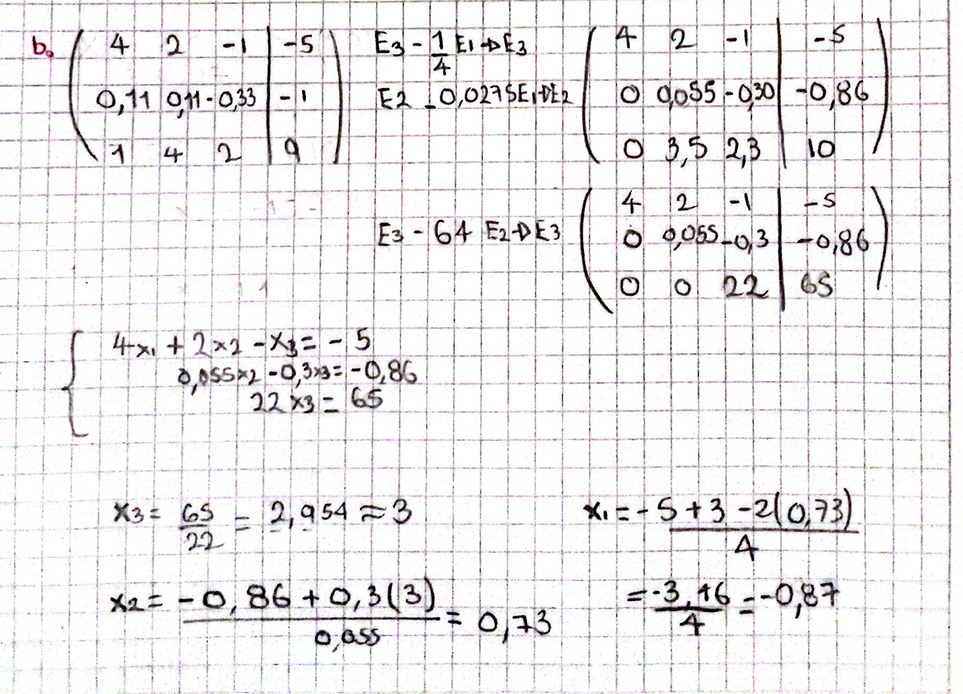

3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y
determine si se necesitan intercambios de fila:

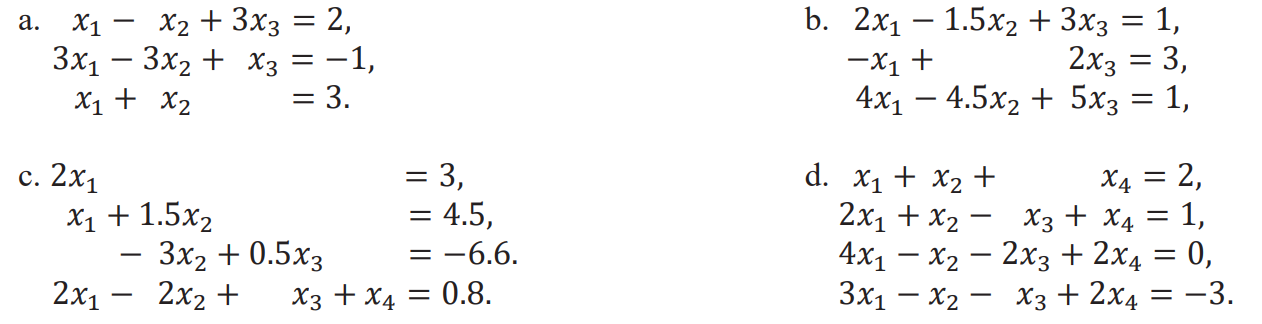

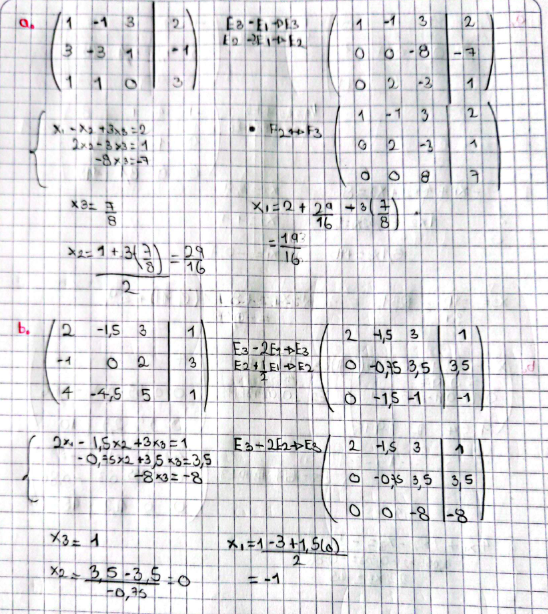

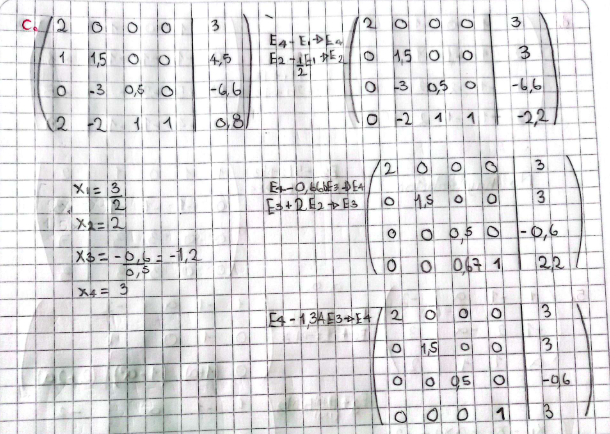

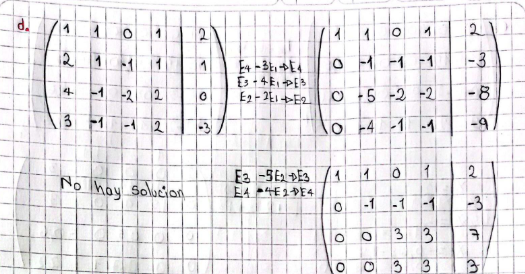

4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los
siguientes sistemas lineales.

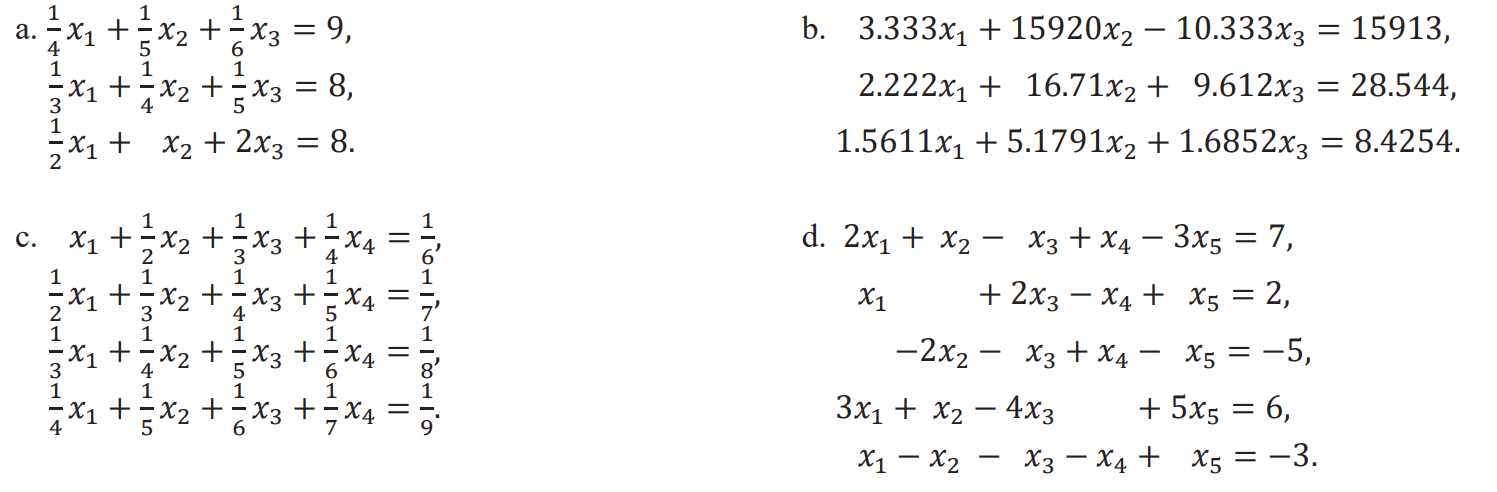

In [35]:
import numpy as np

def gauss_elimination(A, b):
    A = A.copy().astype(np.float32)
    b = b.copy().astype(np.float32)
    n = len(b)
    
    # Eliminación hacia adelante
    for i in range(n):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if A[max_row, i] == 0:
            raise ValueError("No hay solución única.")
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]
        
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
    
    # Sustitución hacia atrás
    x = np.zeros(n, dtype=np.float32)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    return x

In [37]:
# ----------- Sistemas -----------

# Sistema a
A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1,   2]
], dtype=np.float32)
b_a = np.array([9, 8, 8], dtype=np.float32)

# Sistema b
A_b = np.array([
    [3.333, 15920.0, -10.333],
    [2.222, 16.71,   9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float32)
b_b = np.array([15913.0, 28.544, 8.4254], dtype=np.float32)

# Sistema c
A_c = np.array([
    [1,   1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float32)
b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

# Sistema d
A_d = np.array([
    [2, 1, -1, 1, -3],
    [1, 0,  2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
], dtype=np.float32)
b_d = np.array([7, 2, -5, 6, -3], dtype=np.float32)


# Mostrar resultados
print("Solución del sistema a:", gauss_elimination(A_a, b_a))
print("Solución del sistema b:", gauss_elimination(A_b, b_b))
print("Solución del sistema c:", gauss_elimination(A_c, b_c))
print("Solución del sistema d:", gauss_elimination(A_d, b_d))

Solución del sistema a: [-227.07697  476.92322 -177.69237]
Solución del sistema b: [0.99970937 1.0000001  1.0001061 ]
Solución del sistema c: [-0.03174745  0.59525675 -2.3809996   2.7778091 ]
Solución del sistema d: [1.8830409  2.8070176  0.730994   1.4385961  0.09356716]


5. Dado el sistema lineal:

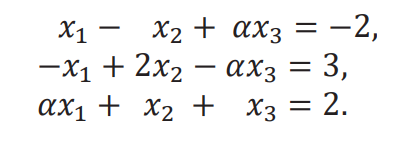

a. Encuentre el valor(es) de 𝛼 para los que el sistema no tiene soluciones.

b. Encuentre el valor(es) de 𝛼 para los que el sistema tiene un número infinito de soluciones.

c. Suponga que existe una única solución para una a determinada, encuentre la solución.

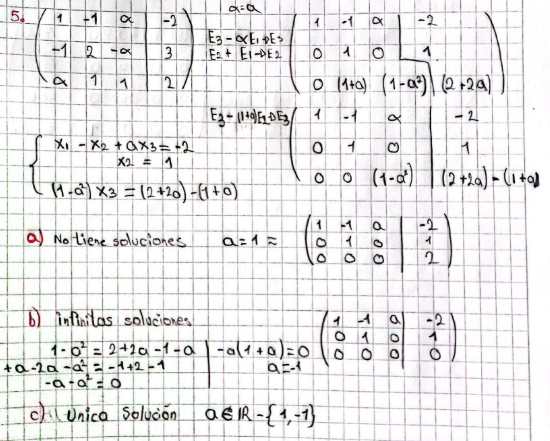

### EJERCICIOS APLICADOS

6. Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si 𝑥𝑗
representa la
población de las j-ésimas especies, para cada 𝑗 = 1, ⋯ , 𝑛; 𝑏𝑖
; representa el suministro diario disponible del i-ésimo
alimento y 𝑎𝑖𝑗 representa la cantidad del i-ésimo alimento, representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio
diario de consumo de cada especie.


a. Si  

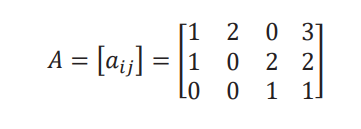 

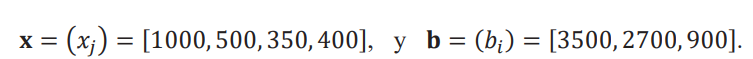



¿Existe suficiente alimento para satisfacer el consumo promedio diario?

B = [3200, 2500, 750]

    Si, ya que el alimento requerido es menor, al suministro diario obtenido

b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema
con el suministro de alimento que cumpla con el consumo?

    x1≤200, x2≤150, x3≤100, x4≤100

c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

    x2≤650, x3≤150, x4≤150

d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

    No es posible incrementar las poblaciones de las especies restantes si la especie 2 se extingue.

### EJERCICIOS TEÓRICOS

7. Repita el ejercicio 4 con el método Gauss-Jordan.


In [45]:
import numpy as np

def gauss_jordan(A, b):
    A = A.copy().astype(np.float32)
    b = b.copy().astype(np.float32)
    n = len(b)
    
    # Formar la matriz aumentada [A | b]
    Ab = np.hstack([A, b.reshape(-1, 1)])
    
    for i in range(n):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        if Ab[max_row, i] == 0:
            raise ValueError("No hay solución única.")
        
        # Intercambiar filas
        Ab[[i, max_row]] = Ab[[max_row, i]]
        
        # Normalizar la fila pivote para que el pivote sea 1
        Ab[i] = Ab[i] / Ab[i, i]
        
        # Eliminar otras entradas en la columna i
        for j in range(n):
            if j != i:
                factor = Ab[j, i]
                Ab[j] -= factor * Ab[i]
    
    # La solución está en la última columna
    x = Ab[:, -1]
    return x


In [46]:
# ----------- Sistemas -----------

# Sistema a
A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1,   2]
], dtype=np.float32)
b_a = np.array([9, 8, 8], dtype=np.float32)

# Sistema b
A_b = np.array([
    [3.333, 15920.0, -10.333],
    [2.222, 16.71,   9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float32)
b_b = np.array([15913.0, 28.544, 8.4254], dtype=np.float32)

# Sistema c
A_c = np.array([
    [1,   1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float32)
b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

# Sistema d
A_d = np.array([
    [2, 1, -1, 1, -3],
    [1, 0,  2, -1, 1],
    [0, -2, -1, 1, -1],
    [3, 1, -4, 0, 5],
    [1, -1, -1, -1, 1]
], dtype=np.float32)
b_d = np.array([7, 2, -5, 6, -3], dtype=np.float32)


# Mostrar resultados
print("Solución del sistema a:", gauss_elimination(A_a, b_a))
print("Solución del sistema b:", gauss_elimination(A_b, b_b))
print("Solución del sistema c:", gauss_elimination(A_c, b_c))
print("Solución del sistema d:", gauss_elimination(A_d, b_d))

Solución del sistema a: [-227.07697  476.92322 -177.69237]
Solución del sistema b: [0.99970937 1.0000001  1.0001061 ]
Solución del sistema c: [-0.03174745  0.59525675 -2.3809996   2.7778091 ]
Solución del sistema d: [1.8830409  2.8070176  0.730994   1.4385961  0.09356716]
